<a href="https://colab.research.google.com/github/emreyoruk64/REGRESYON/blob/main/Covid19Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shriyasingh900_covid19_dataset_path = kagglehub.dataset_download('shriyasingh900/covid19-dataset')

print('Data source import complete.')


100%|██████████| 444k/444k [00:00<00:00, 34.5MB/s]

Extracting files...
Data source import complete.


GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

VERİ OKUMA

In [5]:
df=pd.read_csv("covid_19_clean_complete.csv")

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa


In [6]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


GEREKLİ SÜTUNLARI SEÇME

In [9]:
df=df[["Confirmed","Recovered","Deaths","Active",]]

EKSİK VERİLERİ DOLDURMA

In [10]:
df=df.fillna(0)

In [11]:
df

,Confirmed,Recovered,Deaths,Active
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
49063,865,734,14,117
49064,1691,833,483,375
49065,354,328,7,19
49066,7235,6028,60,1147


BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLERİ BELİRLEME

In [12]:
y=df["Deaths"].values
x=df.drop("Deaths",axis=1).values

In [13]:
y

array([ 0,  0,  0, ...,  7, 60, 12])

In [14]:
x

array([[   0,    0,    0],
       [   0,    0,    0],
       [   0,    0,    0],
       ...,
       [ 354,  328,   19],
       [7235, 6028, 1147],
       [ 505,  128,  365]])

VERİ SETİNİ EĞİTİM VE TEST OLARAK AYIRMA

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
scaler=MinMaxScaler()

In [19]:
scaler.fit(x_train)

MinMaxScaler()

In [20]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MODELİ OLUŞTURMA,DERLEME VE EĞİTME

In [21]:

model = Sequential([
    Dense(12, activation="relu"),
    Dropout(0.2),  # %20 dropout
    Dense(8, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam",loss="mse")


In [24]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, min_lr=1e-6)
model.fit(x_train, y_train, batch_size=128, epochs=300, callbacks=[reduce_lr])

Epoch 1/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 38511884.0000 - learning_rate: 0.0010
Epoch 2/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 43693992.0000 - learning_rate: 0.0010
Epoch 3/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35695368.0000 - learning_rate: 0.0010
Epoch 4/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39682220.0000 - learning_rate: 0.0010
Epoch 5/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 44444164.0000 - learning_rate: 0.0010
Epoch 6/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40417816.0000 - learning_rate: 0.0010
Epoch 7/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 36118172.0000 - learning_rate: 0.0010
Epoch 8/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37821860.0000 - learning_rate: 0.0010
Epoch 9/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 41698620.0000 - learning_rate: 0.0010
Epoch 10/300
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40225320.0000 - learning_rate: 0.0010
Epoch 11/

In [25]:
kayipVeri=pd.DataFrame(model.history.history)

In [26]:
kayipVeri.head()

,loss,learning_rate
0,39117688.0,0.001
1,39099100.0,0.001
2,39030212.0,0.001
3,38900044.0,0.001
4,38713584.0,0.001


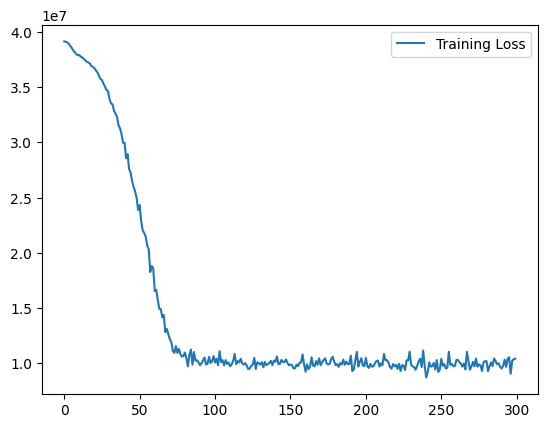

In [27]:
plt.plot(kayipVeri['loss'], label='Training Loss')
plt.legend()
plt.show()

TEST SETİNDE TAHMİN YAPMA

In [28]:
tahminDizisi=model.predict(x_test)

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
tahminDizisi

array([[ 147.79948],
       [ 191.8354 ],
       [ 193.41144],
       ...,
       [ 147.79948],
       [ 156.58385],
       [1062.9978 ]], dtype=float32)

TAHMİN SONUÇLARINI GÖRSELLEŞTİRME

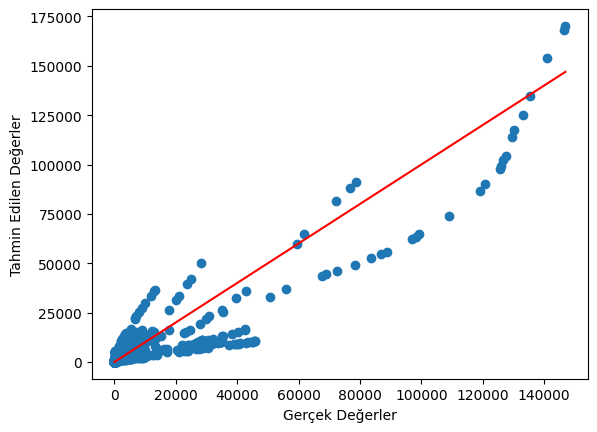

In [30]:
plt.scatter(y_test, tahminDizisi)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45 derece çizgisi
plt.show()

MODELİ DEĞERLENDİRME

In [31]:

mae = mean_absolute_error(y_test, tahminDizisi)
mse = mean_squared_error(y_test, tahminDizisi)
r2 = r2_score(y_test, tahminDizisi)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 608.3860473632812
MSE: 7683807.0
R2 Score: 0.8325645923614502
